# Machine Learning in TensorFlow

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar: 

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../a1/information_theory.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

### Preliminaries...

Before we do anything else, let's load our data and take a quick look at it.  In this example, we're going to build a (very) simple binary classifier based on two floating point features.

In [1]:
import data
%matplotlib inline
from matplotlib import pyplot as plt

(2500, 2)
(500, 2)


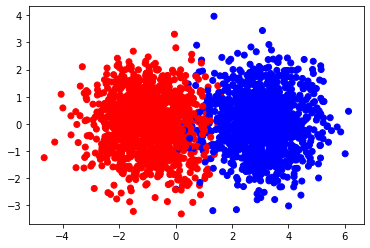

In [2]:
X_train, y_train, X_test, y_test = data.generate_data(2500, 500) #large test size to make diagrams better
print(X_train.shape)
print(X_test.shape)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

In [5]:
print(X_train[0:2])

[[ 2.35949754 -0.12385485]
 [-0.50121902 -0.9283033 ]]


### Training Logistic Regression

It's clear that the data is separable with a vertical line.  The simplest model we can use for this data is logistic regression.  Let's do that.

In [6]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.3.1


In [7]:
#####
## MAKE SURE YOU UNDERSTAND THIS CODE!!
##
## Look up keras.Sequential and keras.layers.Dense!
##
## You will need to use them to write your own model down below!
#####

# Sequential models are ones where the set of specified layers are stacked each on top of the previous.
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity.
    keras.layers.Dense(1, activation='sigmoid')
])

# adam optimizer is a fancier version of gradient descent. You can read more about it here: https://arxiv.org/pdf/1412.6980.pdf
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 857us/step - loss: 2.5309 - accuracy: 0.0908
Epoch 2/100
79/79 [==============================] - 0s 946us/step - loss: 2.3795 - accuracy: 0.0860
Epoch 3/100
79/79 [==============================] - 0s 785us/step - loss: 2.2300 - accuracy: 0.0836
Epoch 4/100
79/79 [==============================] - 0s 747us/step - loss: 2.0838 - accuracy: 0.0764
Epoch 5/100
79/79 [==============================] - 0s 734us/step - loss: 1.9424 - accuracy: 0.0712
Epoch 6/100
79/79 [==============================] - 0s 709us/step - loss: 1.8053 - accuracy: 0.0672
Epoch 7/100
79/79 [==============================] - 0s 861us/step - loss: 1.6743 - accuracy: 0.0644
Epoch 8/100
79/79 [==============================] - 0s 620us/step - loss: 1.5474 - accuracy: 0.0600
Epoch 9/100
79/79 [==============================] - 0s 709us/step - loss: 1.4271 - accuracy: 0.0556
Epoch 10/100
79/79 [==============================] - 0s 798us/step - loss: 1.3150 - accura

79/79 [==============================] - 0s 848us/step - loss: 0.0948 - accuracy: 0.9752
Epoch 82/100
79/79 [==============================] - 0s 810us/step - loss: 0.0936 - accuracy: 0.9752
Epoch 83/100
79/79 [==============================] - 0s 696us/step - loss: 0.0924 - accuracy: 0.9752
Epoch 84/100
79/79 [==============================] - 0s 734us/step - loss: 0.0913 - accuracy: 0.9756
Epoch 85/100
79/79 [==============================] - 0s 873us/step - loss: 0.0902 - accuracy: 0.9756
Epoch 86/100
79/79 [==============================] - 0s 753us/step - loss: 0.0891 - accuracy: 0.9752
Epoch 87/100
79/79 [==============================] - 0s 734us/step - loss: 0.0881 - accuracy: 0.9756
Epoch 88/100
79/79 [==============================] - 0s 709us/step - loss: 0.0871 - accuracy: 0.9752
Epoch 89/100
79/79 [==============================] - 0s 759us/step - loss: 0.0861 - accuracy: 0.9756
Epoch 90/100
79/79 [==============================] - 0s 810us/step - loss: 0.0852 - accuracy: 

**Hint:** You should expect to see an initial loss here of 0.3 - 1.2.  This is because a well-initialized random classifier tends to output a uniform distribution.  For each example in the batch, we either compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`).  Both cases result in $-\lg(0.5) = lg(2) = 1.0$.

Of course, your random classifier won't output exactly uniform distributions (it's random after all), but you should anticipate it being pretty close.  If it's not, your initialization may be broken and make it hard for your network to learn.

**[Optional]** Some technical details... if your randomly initialized network is outputting very confident predictions, the loss computed may be very large while at the same time the sigmoids in the network are likely in saturation, quickly shrinking gradients.  The result is that you make tiny updates in the face of a huge loss.

Let's use our model to make predictions on the test set:

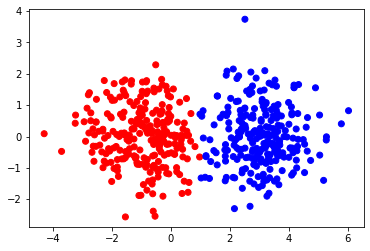

In [8]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### But what about a harder problem?

The case above, the data was linearly separable making it susceptible to a linear classifier.

But what if you had data that looked more like this?

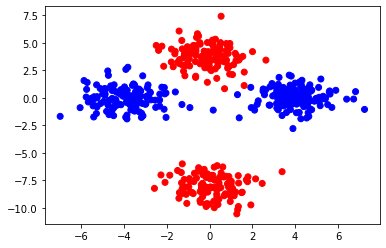

In [9]:
X_train, y_train, X_test, y_test = data.generate_non_linear_data(2500, 500)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [10]:
linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 2.6991 - accuracy: 0.6724
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 2.3659 - accuracy: 0.6744
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 2.1324 - accuracy: 0.6764
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 1.9460 - accuracy: 0.6824
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 1.7835 - accuracy: 0.6840
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 1.6395 - accuracy: 0.6880
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 1.5090 - accuracy: 0.6896
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 1.3900 - accuracy: 0.6896
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 1.2796 - accuracy: 0.6952
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 1.1777 - accuracy: 0.6948
Epoch 11/

79/79 [==============================] - 0s 865us/step - loss: 0.6668 - accuracy: 0.6436
Epoch 82/100
79/79 [==============================] - 0s 772us/step - loss: 0.6667 - accuracy: 0.6468
Epoch 83/100
79/79 [==============================] - 0s 760us/step - loss: 0.6668 - accuracy: 0.6460
Epoch 84/100
79/79 [==============================] - 0s 730us/step - loss: 0.6668 - accuracy: 0.6436
Epoch 85/100
79/79 [==============================] - 0s 684us/step - loss: 0.6668 - accuracy: 0.6388
Epoch 86/100
79/79 [==============================] - 0s 886us/step - loss: 0.6668 - accuracy: 0.6368
Epoch 87/100
79/79 [==============================] - 0s 785us/step - loss: 0.6669 - accuracy: 0.6496
Epoch 88/100
79/79 [==============================] - 0s 684us/step - loss: 0.6670 - accuracy: 0.6472
Epoch 89/100
79/79 [==============================] - 0s 736us/step - loss: 0.6668 - accuracy: 0.6548
Epoch 90/100
79/79 [==============================] - 0s 671us/step - loss: 0.6668 - accuracy: 

Again, let's make predictions on the test set...

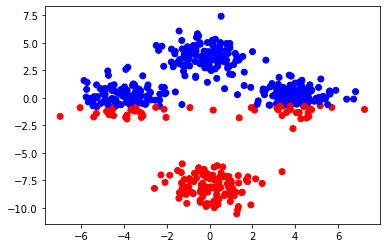

In [11]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

That isn't very good!

### Building a deeper network

Ok, now it's your turn.  Build a deeper neural network below.  Try to achieve a loss less than 0.05.  Initialization is random, but try to make it happen "almost" always.

In [17]:
X_train.shape

(2500, 2)

In [71]:
history = [None]*5

len(history)
history

[None, None, None, None, None]

In [96]:
#doing multiple runs
history1 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 4 #5 #10

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    # add a droput layer
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history1[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.6040
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.7048
Epoch 3/100
79/79 [==============================] - 0s 924us/step - loss: 0.3088 - accuracy: 0.7520
Epoch 4/100
79/79 [==============================] - 0s 911us/step - loss: 0.2743 - accuracy: 0.9624
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.9664
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9728
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2103 - accuracy: 0.9740
Epoch 8/100
79/79 [==============================] - 0s 810us/step - loss: 0.1961 - accuracy: 0.9760
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9772
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9796
Epo

79/79 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9968
Epoch 80/100
79/79 [==============================] - 0s 810us/step - loss: 0.0183 - accuracy: 0.9968
Epoch 81/100
79/79 [==============================] - 0s 785us/step - loss: 0.0180 - accuracy: 0.9968
Epoch 82/100
79/79 [==============================] - 0s 696us/step - loss: 0.0178 - accuracy: 0.9968
Epoch 83/100
79/79 [==============================] - 0s 801us/step - loss: 0.0175 - accuracy: 0.9968
Epoch 84/100
79/79 [==============================] - 0s 797us/step - loss: 0.0172 - accuracy: 0.9968
Epoch 85/100
79/79 [==============================] - 0s 886us/step - loss: 0.0170 - accuracy: 0.9968
Epoch 86/100
79/79 [==============================] - 0s 881us/step - loss: 0.0167 - accuracy: 0.9968
Epoch 87/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9968
Epoch 88/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9968

Epoch 60/100
79/79 [==============================] - 0s 1000us/step - loss: 0.0099 - accuracy: 0.9976
Epoch 61/100
79/79 [==============================] - 0s 899us/step - loss: 0.0098 - accuracy: 0.9976
Epoch 62/100
79/79 [==============================] - 0s 823us/step - loss: 0.0097 - accuracy: 0.9976
Epoch 63/100
79/79 [==============================] - 0s 930us/step - loss: 0.0095 - accuracy: 0.9976
Epoch 64/100
79/79 [==============================] - 0s 810us/step - loss: 0.0093 - accuracy: 0.9976
Epoch 65/100
79/79 [==============================] - 0s 795us/step - loss: 0.0092 - accuracy: 0.9976
Epoch 66/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9976
Epoch 67/100
79/79 [==============================] - 0s 987us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 68/100
79/79 [==============================] - 0s 835us/step - loss: 0.0088 - accuracy: 0.9980
Epoch 69/100
79/79 [==============================] - 0s 873us/step - loss: 0.0087 

79/79 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9952
Epoch 42/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9960
Epoch 43/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9960
Epoch 44/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9960
Epoch 45/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9964
Epoch 46/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9964
Epoch 47/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9968
Epoch 48/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9964
Epoch 49/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9972
Epoch 50/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9968
Epoch 51/100


79/79 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9940
Epoch 22/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9944
Epoch 23/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9956
Epoch 24/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9956
Epoch 25/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9956
Epoch 26/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9956
Epoch 27/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9960
Epoch 28/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9960
Epoch 29/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9960
Epoch 30/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9964
Epoch 31/100


79/79 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.5044
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.5276
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.6420
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8136
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.9144
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.9464
Epoch 8/100
79/79 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9604
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9652
Epoch 10/100
79/79 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9676
Epoch 11/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9724
Epoch 12/100
79/79 [

79/79 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9956
Epoch 83/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9956
Epoch 84/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9956
Epoch 85/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9960
Epoch 86/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9960
Epoch 87/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9960
Epoch 88/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9960
Epoch 89/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9956
Epoch 90/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9956
Epoch 91/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9960
Epoch 92/100


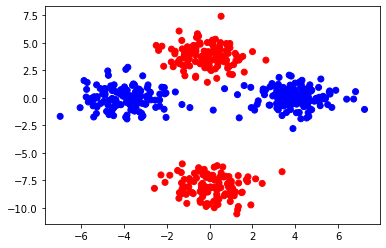

In [34]:
predictions = deep_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

In [97]:
#doing multiple runs
history2 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 4 #5 #10

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Let's go nuts in terms of layers and neurons per layer and actively try to overfit

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history2[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 911us/step - loss: 0.7338 - accuracy: 0.6060
Epoch 2/100
79/79 [==============================] - 0s 917us/step - loss: 0.5256 - accuracy: 0.7352
Epoch 3/100
79/79 [==============================] - 0s 848us/step - loss: 0.4191 - accuracy: 0.9540
Epoch 4/100
79/79 [==============================] - 0s 886us/step - loss: 0.3491 - accuracy: 0.9932
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2899 - accuracy: 0.9960
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9964
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9968
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9956
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9964
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9964
E

79/79 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9972
Epoch 82/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9972
Epoch 83/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9972
Epoch 84/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9972
Epoch 85/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9968
Epoch 86/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9972 ETA: 0s - loss: 0.0094 - accuracy: 0.99
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9972
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9972
Epoch 89/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9968
Epoch 90/100
79/79 [==============================] - 0s 3ms/step - loss:

79/79 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9968
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9968
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9972
Epoch 65/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9972
Epoch 66/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9968
Epoch 67/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9972
Epoch 68/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9972
Epoch 69/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9972
Epoch 70/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9972
Epoch 71/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9972
Epoch 72/100


Epoch 43/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9972
Epoch 44/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9972
Epoch 45/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9972
Epoch 46/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9972
Epoch 47/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9972
Epoch 48/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9976
Epoch 49/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9976
Epoch 50/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9976
Epoch 51/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9976
Epoch 52/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9976


79/79 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9976
Epoch 25/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9976
Epoch 26/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9976
Epoch 27/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9976
Epoch 28/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9976
Epoch 29/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9976
Epoch 30/100
79/79 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.99 - 0s 1ms/step - loss: 0.0115 - accuracy: 0.9976
Epoch 31/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9976
Epoch 32/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9976
Epoch 33/100
79/79 [==============================] - 0s 1ms/step - los

79/79 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.7548
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.7916
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8548
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9236
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9620
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9796
Epoch 11/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9864
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9884
Epoch 13/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9904
Epoch 14/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9916
Epoch 15/100
79/7

79/79 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 86/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9972
Epoch 87/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9964
Epoch 88/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9964
Epoch 89/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 90/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 91/100
79/79 [==============================] - 0s 1000us/step - loss: 0.0096 - accuracy: 0.9964
Epoch 92/100
79/79 [==============================] - 0s 995us/step - loss: 0.0093 - accuracy: 0.9964
Epoch 93/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 94/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 95

In [98]:
#doing multiple runs
history3 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 5 #10

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history3[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 785us/step - loss: 0.8610 - accuracy: 0.6504
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6640
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.6792
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7340
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8856
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.9516
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9748
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1837 - accuracy: 0.9844
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1547 - accuracy: 0.9892
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9912
Epoch 1

79/79 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 83/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 84/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 85/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 86/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 89/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 91/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 92/100


79/79 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 66/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9980
Epoch 67/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 68/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9980
Epoch 69/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.9980
Epoch 70/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 71/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9980
Epoch 72/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9980
Epoch 73/100


79/79 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9976
Epoch 45/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9976
Epoch 46/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 0.9976
Epoch 47/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9976
Epoch 48/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9976
Epoch 49/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9976
Epoch 50/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9976
Epoch 51/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9976
Epoch 52/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9976
Epoch 53/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9976
Epoch 54/100


79/79 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.7352
Epoch 26/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.7360
Epoch 27/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.7364
Epoch 28/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.7372
Epoch 29/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.7376
Epoch 30/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.7376
Epoch 31/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.7384
Epoch 32/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.7388
Epoch 33/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.7404
Epoch 34/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.7400
Epoch 35/100


79/79 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.5600
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.5800
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.5992
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.6188
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.6420
Epoch 11/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.6548
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.6684
Epoch 13/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.6804
Epoch 14/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.6920
Epoch 15/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.6976
Epoch 16/100
79/

79/79 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.7480
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.7480
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.7480
Epoch 89/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.7480
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.7480
Epoch 91/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.7480
Epoch 92/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.7480
Epoch 93/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.7480
Epoch 94/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.7480
Epoch 95/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.7480
Epoch 96/100


In [99]:
#doing multiple runs
history4 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 5 #10

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history4[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.8300
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.9756
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.9964
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9968
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9940
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9960
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9964
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9968
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9980
Epoch 10/100
79/79 [==============================] - 0s 975us/step - loss: 0.0291 - accuracy: 0.9972
Epoch 1

79/79 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 83/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9972
Epoch 84/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9968
Epoch 85/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9976
Epoch 86/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9976
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9972
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 89/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 90/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9976
Epoch 91/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 92/100


79/79 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9972
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 66/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 67/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9976
Epoch 68/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9976
Epoch 69/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9976
Epoch 70/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9972
Epoch 71/100
79/79 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9972
Epoch 72/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9976
Epoch 73/100
79/79 [==============================] - 0s 1ms/step - los

79/79 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 46/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9972
Epoch 47/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9976
Epoch 48/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 49/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 50/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9976
Epoch 51/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9976
Epoch 52/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9976
Epoch 53/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9972
Epoch 54/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9976
Epoch 55/100


79/79 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 27/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9976
Epoch 28/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 29/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9976
Epoch 30/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9980
Epoch 31/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 32/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9972
Epoch 33/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9972
Epoch 34/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 35/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 36/100


79/79 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9896
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9932
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9940
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9944
Epoch 11/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9956
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9960
Epoch 13/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9964
Epoch 14/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9960
Epoch 15/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9960
Epoch 16/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9956
Epoch 17/100
79

79/79 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9972
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9972
Epoch 89/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9972
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 91/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 92/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9972
Epoch 93/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9972
Epoch 94/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9972
Epoch 95/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9972
Epoch 96/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9968
Epoch 97/100


In [104]:
#doing multiple runs
history5 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 10

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history5[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.5392
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7300
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.7768
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.9448
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9764
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9900
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9924
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9964
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9968
Epoch 10/100
79/79 [==============================] - 0s 950us/step - loss: 0.0537 - accuracy: 0.9964
Epoch 1

79/79 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 82/100
79/79 [==============================] - 0s 861us/step - loss: 0.0062 - accuracy: 0.9980
Epoch 83/100
79/79 [==============================] - 0s 873us/step - loss: 0.0063 - accuracy: 0.9980
Epoch 84/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 85/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 86/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 87/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 89/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 90/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 91/

79/79 [==============================] - 0s 823us/step - loss: 0.0069 - accuracy: 0.9972
Epoch 63/100
79/79 [==============================] - 0s 841us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 66/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9972
Epoch 67/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 68/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 69/100
79/79 [==============================] - 0s 873us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 70/100
79/79 [==============================] - 0s 873us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 71/100
79/79 [==============================] - 0s 870us/step - loss: 0.0066 - accuracy: 0.9972
Epo

Epoch 43/100
79/79 [==============================] - 0s 975us/step - loss: 0.0093 - accuracy: 0.9976
Epoch 44/100
79/79 [==============================] - 0s 785us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 45/100
79/79 [==============================] - 0s 734us/step - loss: 0.0089 - accuracy: 0.9976
Epoch 46/100
79/79 [==============================] - 0s 747us/step - loss: 0.0088 - accuracy: 0.9976
Epoch 47/100
79/79 [==============================] - 0s 905us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 48/100
79/79 [==============================] - 0s 810us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 49/100
79/79 [==============================] - 0s 937us/step - loss: 0.0084 - accuracy: 0.9976
Epoch 50/100
79/79 [==============================] - 0s 788us/step - loss: 0.0083 - accuracy: 0.9976
Epoch 51/100
79/79 [==============================] - 0s 772us/step - loss: 0.0083 - accuracy: 0.9976
Epoch 52/100
79/79 [==============================] - 0s 785us/step - loss: 0.0081

79/79 [==============================] - 0s 822us/step - loss: 0.0184 - accuracy: 0.9976
Epoch 24/100
79/79 [==============================] - 0s 944us/step - loss: 0.0175 - accuracy: 0.9976
Epoch 25/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9976
Epoch 26/100
79/79 [==============================] - 0s 835us/step - loss: 0.0160 - accuracy: 0.9980
Epoch 27/100
79/79 [==============================] - 0s 835us/step - loss: 0.0153 - accuracy: 0.9980
Epoch 28/100
79/79 [==============================] - 0s 911us/step - loss: 0.0147 - accuracy: 0.9980
Epoch 29/100
79/79 [==============================] - 0s 899us/step - loss: 0.0142 - accuracy: 0.9980
Epoch 30/100
79/79 [==============================] - 0s 848us/step - loss: 0.0137 - accuracy: 0.9980
Epoch 31/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9980
Epoch 32/100
79/79 [==============================] - 0s 919us/step - loss: 0.0129 - accuracy: 0.99

79/79 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.7440
Epoch 4/100
79/79 [==============================] - 0s 848us/step - loss: 0.3773 - accuracy: 0.7444
Epoch 5/100
79/79 [==============================] - 0s 861us/step - loss: 0.2942 - accuracy: 0.8048
Epoch 6/100
79/79 [==============================] - 0s 920us/step - loss: 0.2390 - accuracy: 0.9408
Epoch 7/100
79/79 [==============================] - 0s 925us/step - loss: 0.1983 - accuracy: 0.9740
Epoch 8/100
79/79 [==============================] - 0s 823us/step - loss: 0.1663 - accuracy: 0.9856
Epoch 9/100
79/79 [==============================] - 0s 785us/step - loss: 0.1399 - accuracy: 0.9916
Epoch 10/100
79/79 [==============================] - 0s 759us/step - loss: 0.1172 - accuracy: 0.9936
Epoch 11/100
79/79 [==============================] - 0s 772us/step - loss: 0.0980 - accuracy: 0.9948
Epoch 12/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9956
Epo

79/79 [==============================] - 0s 785us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 84/100
79/79 [==============================] - 0s 911us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 85/100
79/79 [==============================] - 0s 873us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 86/100
79/79 [==============================] - 0s 823us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 87/100
79/79 [==============================] - 0s 941us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 88/100
79/79 [==============================] - 0s 886us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 89/100
79/79 [==============================] - 0s 850us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 90/100
79/79 [==============================] - 0s 899us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 91/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9976
Epoch 92/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.99

In [105]:
#doing multiple runs
history6 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 10

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history6[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.9084
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9960
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9972
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9972
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9972
Epoch 6/100
79/79 [==============================] - 0s 987us/step - loss: 0.0172 - accuracy: 0.9976
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9972
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9972
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9976
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9976
Epoch 1

79/79 [==============================] - 0s 797us/step - loss: 0.0056 - accuracy: 0.9976
Epoch 83/100
79/79 [==============================] - 0s 848us/step - loss: 0.0058 - accuracy: 0.9972
Epoch 84/100
79/79 [==============================] - 0s 797us/step - loss: 0.0056 - accuracy: 0.9972
Epoch 85/100
79/79 [==============================] - 0s 886us/step - loss: 0.0059 - accuracy: 0.9976
Epoch 86/100
79/79 [==============================] - 0s 785us/step - loss: 0.0057 - accuracy: 0.9980
Epoch 87/100
79/79 [==============================] - 0s 885us/step - loss: 0.0057 - accuracy: 0.9976
Epoch 88/100
79/79 [==============================] - 0s 836us/step - loss: 0.0056 - accuracy: 0.9980
Epoch 89/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.9976
Epoch 90/100
79/79 [==============================] - 0s 899us/step - loss: 0.0055 - accuracy: 0.9976
Epoch 91/100
79/79 [==============================] - 0s 785us/step - loss: 0.0056 - accuracy: 0.

79/79 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9980
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9972
Epoch 64/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9976
Epoch 65/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9980
Epoch 66/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9968
Epoch 67/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9972
Epoch 68/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9972
Epoch 69/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9972
Epoch 70/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9972
Epoch 71/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9976
Epoch 72/100


79/79 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9976
Epoch 44/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9972
Epoch 45/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9976
Epoch 46/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 47/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9972
Epoch 48/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9972
Epoch 49/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9972
Epoch 50/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9972
Epoch 51/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9972
Epoch 52/100
79/79 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.9972
Epoch 53/100


79/79 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 26/100
79/79 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 27/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 28/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9980
Epoch 29/100
79/79 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9972
Epoch 30/100
79/79 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 31/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9976
Epoch 32/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9972
Epoch 33/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9972
Epoch 34/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 35/100


79/79 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9976
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9972
Epoch 8/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9976
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9976
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9976
Epoch 11/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9976
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9976
Epoch 13/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9976
Epoch 14/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9972
Epoch 15/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9972
Epoch 16/100
79/

79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9972
Epoch 88/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9972
Epoch 89/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9976
Epoch 90/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9968
Epoch 91/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9972
Epoch 92/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9972
Epoch 93/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9968
Epoch 94/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 95/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9976
Epoch 96/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9968
Epoch 97/100


In [115]:
#doing multiple runs
history7 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 3

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),


    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history7[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6044
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.6048
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7248
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7728
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8168
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8524
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8948
Epoch 8/100
79/79 [==============================] - 0s 975us/step - loss: 0.2429 - accuracy: 0.9304
Epoch 9/100
79/79 [==============================] - 0s 936us/step - loss: 0.2005 - accuracy: 0.9464
Epoch 10/100
79/79 [==============================] - 0s 975us/step - loss: 0.1670 - accuracy: 0.9628
Epo

79/79 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9964
Epoch 83/100
79/79 [==============================] - 0s 994us/step - loss: 0.0091 - accuracy: 0.9964
Epoch 84/100
79/79 [==============================] - 0s 958us/step - loss: 0.0089 - accuracy: 0.9964
Epoch 85/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9964
Epoch 86/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9964
Epoch 87/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9968
Epoch 88/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9964
Epoch 89/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9964
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9964
Epoch 91/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9964
Epoch 92/

79/79 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9828
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9832
Epoch 66/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9828
Epoch 67/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9832
Epoch 68/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9828
Epoch 69/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9828
Epoch 70/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9828
Epoch 71/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9832
Epoch 72/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9828
Epoch 73/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9832
Epoch 74/100


79/79 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9960
Epoch 46/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9956
Epoch 47/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9960
Epoch 48/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9960
Epoch 49/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9956
Epoch 50/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9960
Epoch 51/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9960
Epoch 52/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9960
Epoch 53/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9964
Epoch 54/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9960
Epoch 55/100


79/79 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9968
Epoch 27/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9968
Epoch 28/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9968
Epoch 29/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9968
Epoch 30/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9968
Epoch 31/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9968
Epoch 32/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9968
Epoch 33/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9968
Epoch 34/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9964
Epoch 35/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9964
Epoch 36/100


79/79 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7560
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.7784
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8184
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8772
Epoch 11/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.9224
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.9504
Epoch 13/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.9656
Epoch 14/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.9704
Epoch 15/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9772
Epoch 16/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9808
Epoch 17/100
79

79/79 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9972
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9972
Epoch 91/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9976
Epoch 92/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9972
Epoch 93/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9976
Epoch 94/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9972
Epoch 95/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9976
Epoch 96/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9976
Epoch 97/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9976
Epoch 98/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9976
Epoch 99/100


In [134]:
#doing multiple runs
history8 = [None]*5
for i in range(0,5):
    dropout = 0.0
    num_neurons = 7

    deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE

    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:

    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    #add a dropout layer
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),
        
    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),

    keras.layers.Dense(num_neurons, activation='relu'),
    keras.layers.Dropout(dropout),
   
    ### END YOUR CODE

    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
    ])

    deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history8[i] = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7196
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.9692
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9956
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9968
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9964
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 11/

79/79 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9976
Epoch 83/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 84/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 85/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9976
Epoch 86/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 87/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 88/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9976
Epoch 89/100
79/79 [==============================] - 0s 6ms/step - loss: 0.0054 - accuracy: 0.9976
Epoch 90/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 91/100
79/79 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 92/100


79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 64/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 65/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 66/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 67/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 68/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 69/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 70/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 71/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 72/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 73/100


79/79 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9980
Epoch 46/100
79/79 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 47/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 48/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 49/100
79/79 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.99 - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 50/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9976
Epoch 51/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9964
Epoch 52/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9980
Epoch 53/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 54/100
79/79 [==============================] - 0s 6ms/step - los

79/79 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9968
Epoch 26/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9980
Epoch 27/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 28/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9972
Epoch 29/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9976
Epoch 30/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 31/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9976
Epoch 32/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9972
Epoch 33/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9968
Epoch 34/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9972
Epoch 35/100


79/79 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9972
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9980
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9968
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9972
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9972
Epoch 11/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 12/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9968
Epoch 13/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9968
Epoch 14/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9984
Epoch 15/100
79/7

79/79 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 87/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 88/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9976
Epoch 89/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9980
Epoch 90/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9984 ETA: 0s - loss: 0.0127 - accuracy: 0.
Epoch 91/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 92/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 93/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 94/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 95/100
79/79 [==============================] - 0s 3ms/step - loss: 0

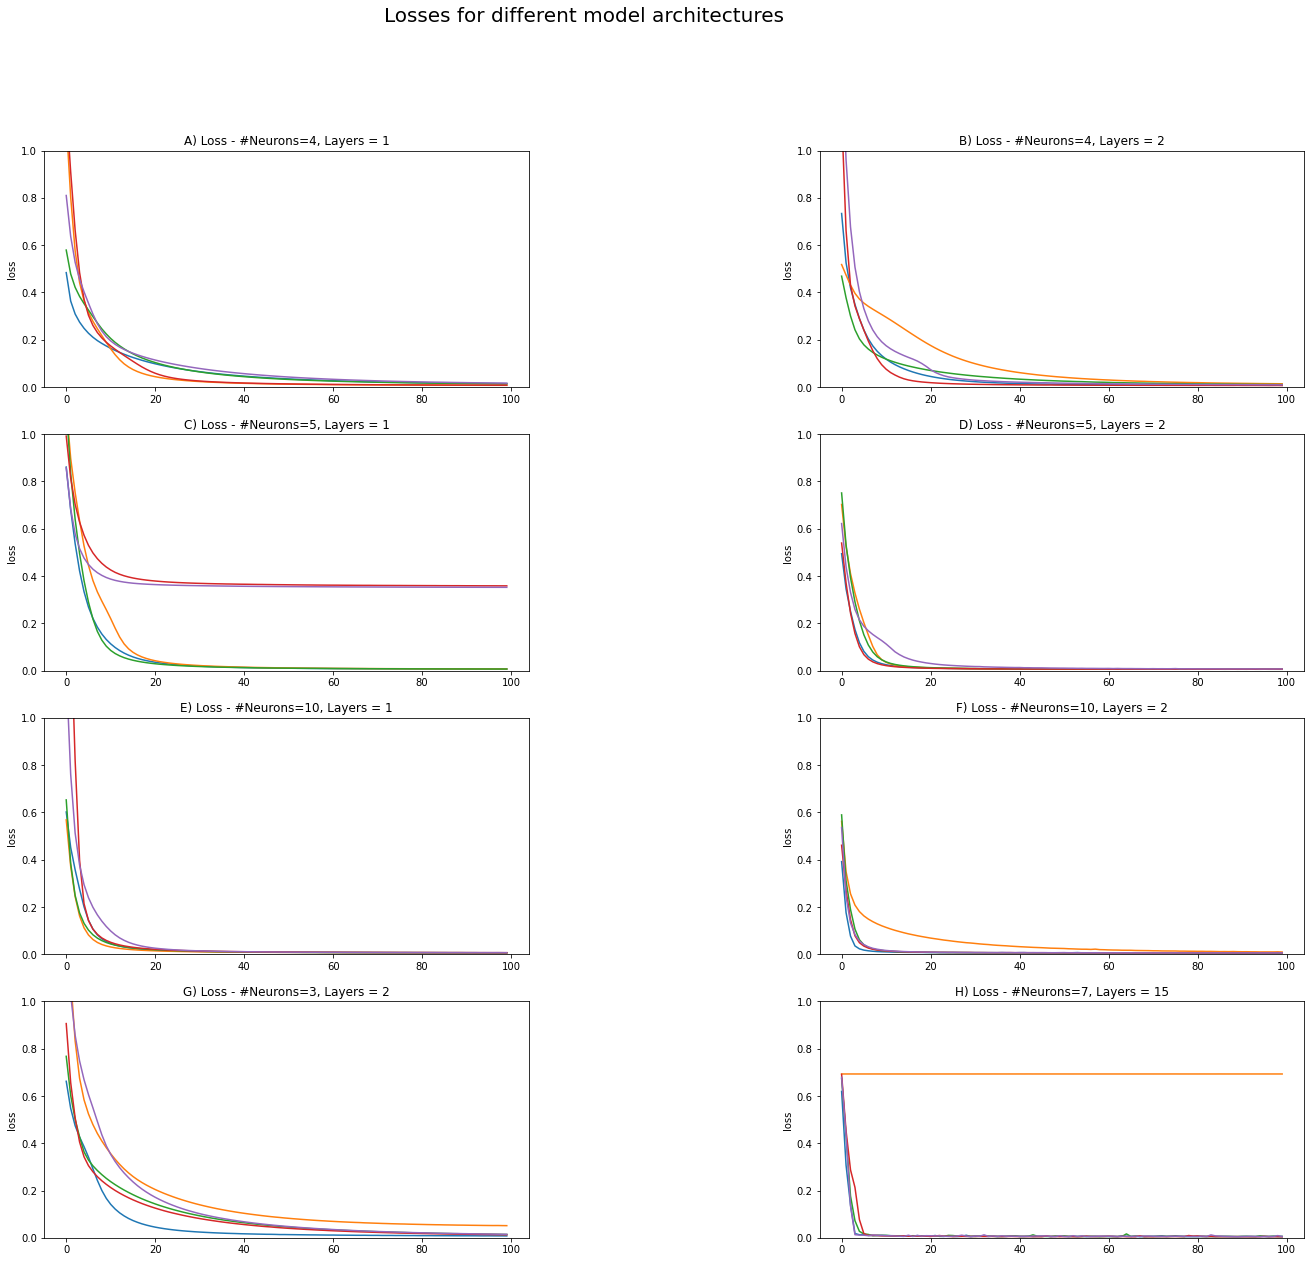

In [139]:
fig, axs = plt.subplots(4, 2)
fig.subplots_adjust(left=0.2, wspace=0.6)
#make_plot(axs, history_1, history_2)
for i in range (0, 5):
    axs[0, 0].plot(history1[i].history['loss'], label = 'Run ' + str(i))
    axs[0, 1].plot(history2[i].history['loss'], label = 'Run ' + str(i))
    axs[1, 0].plot(history3[i].history['loss'], label = 'Run ' + str(i))
    axs[1, 1].plot(history4[i].history['loss'], label = 'Run ' + str(i))
    axs[2, 0].plot(history5[i].history['loss'], label = 'Run ' + str(i))
    axs[2, 1].plot(history6[i].history['loss'], label = 'Run ' + str(i))
    axs[3, 0].plot(history7[i].history['loss'], label = 'Run ' + str(i))
    axs[3, 1].plot(history8[i].history['loss'], label = 'Run ' + str(i))
    
axs[0, 0].set_title('A) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=4, layers=1))
axs[0, 0].set_ylabel('loss')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].set_title('B) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=4, layers=2))
axs[0, 1].set_ylabel('loss')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].set_title('C) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=5, layers=1))
axs[1, 0].set_ylabel('loss')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].set_title('D) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=5, layers=2))
axs[1, 1].set_ylabel('loss')
axs[1, 1].set_ylim(0, 1)

axs[2, 0].set_title('E) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=10, layers=1))
axs[2, 0].set_ylabel('loss')
axs[2, 0].set_ylim(0, 1)

axs[2, 1].set_title('F) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=10, layers=2))
axs[2, 1].set_ylabel('loss')
axs[2, 1].set_ylim(0, 1)

axs[3, 0].set_title('G) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=3, layers=2))
axs[3, 0].set_ylabel('loss')
axs[3, 0].set_ylim(0, 1)

axs[3, 1].set_title('H) Loss - #Neurons={num_neurons}, Layers = {layers}' .format(num_neurons=7, layers=15))
axs[3, 1].set_ylabel('loss')
axs[3, 1].set_ylim(0, 1)

#fig.align_ylabels(axs[:, 1])
fig.set_size_inches(25, 20)
#plt.legend(framealpha=1, frameon=True)

#handles, labels = axs[3,3].get_legend_handles_labels()
#fig.legend(loc='upper center')
plt.suptitle('Losses for different model architectures', fontsize = 20)
plt.show()

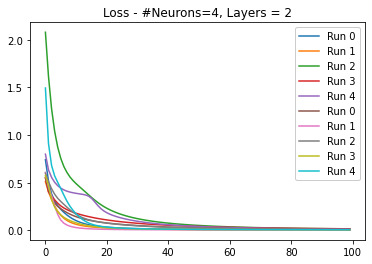

In [88]:
#plots of loss
for i in range (0, 5):
    plt.plot(history1[i].history['loss'], label = 'Run ' + str(i))
plt.title('Loss - #Neurons={num_neurons}, Layers = 1' .format(num_neurons=num_neurons)) # - no dropout')
plt.legend(framealpha=1, frameon=True)


#plots of loss
for i in range (0, 5):
    plt.plot(history2[i].history['loss'], label = 'Run ' + str(i))
plt.title('Loss - #Neurons={num_neurons}, Layers = 2' .format(num_neurons=num_neurons)) # - no dropout')
plt.legend(framealpha=1, frameon=True)

In [52]:
dropout = 0.0
num_neurons = 100 #5 #10

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   What's the minimum number of hidden layers you can get away with?
    #   Conversely, what's the smallest hidden vector dimensions you can use if you use more hidden layers?

    ### YOUR CODE HERE
    
    # Let's go nuts in terms of layers and neurons per layer and actively try to overfit
        
    # Add 5 densely-connected layers with num_neurons units followed by dropout to the model:
    
    keras.layers.Dense(num_neurons, activation='relu',
                 #kernel_initializer=tf.keras.initializers.glorot_normal ,
                 input_shape=(2,)),         # '20' is the number of features of the input

    # add a droput layer
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),

    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),
        
    #keras.layers.Dense(num_neurons, activation='relu'),
    #keras.layers.Dropout(dropout),
    
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2 = deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8300
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9960
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9976
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9972
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9976
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9980
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9976
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9976
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9980
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9976
Epoch 11/

79/79 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9972
Epoch 83/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9976
Epoch 84/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9972
Epoch 85/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9972
Epoch 86/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9980
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9976
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9968
Epoch 89/100
79/79 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9972
Epoch 90/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9972
Epoch 91/100
79/79 [==============================] - 0s 2ms/step - los

In [64]:
# 4-window plot. Small modification from matplotlib examples.

def make_plot(axs, history1, history2):
    box = dict(facecolor='yellow', pad=5, alpha=0.2)

    ax1 = axs[0, 0]
    ax1.plot(history1.history['loss'])
    #ax1.plot(history1.history['val_loss'])
    ax1.set_title('loss - no dropout')
    ax1.set_ylabel('loss', bbox=box)
    ax1.set_ylim(0, 0.7)

    ax3 = axs[1, 0]
    ax3.set_title('accuracy - no dropout')
    #ax3.plot(history1.history['categorical_accuracy'])
    #ax3.plot(history1.history['val_categorical_accuracy'])
    ax3.plot(history1.history['accuracy'])
    ax3.set_ylabel('accuracy', bbox=box)
    ax3.set_ylim(0.7, 1.0)


    ax2 = axs[0, 1]
    ax2.set_title('loss - with dropout')
    ax2.plot(history2.history['loss'])
    #ax2.plot(history2.history['val_loss'])
    ax2.set_ylim(0, 0.7)

    ax4 = axs[1, 1]
    ax4.set_title('accuracy - with dropout')
    #ax4.plot(history2.history['categorical_accuracy'])
    #ax4.plot(history2.history['val_categorical_accuracy'])
    ax4.plot(history2.history['accuracy'])
    ax4.set_ylim(0.7, 1.0)

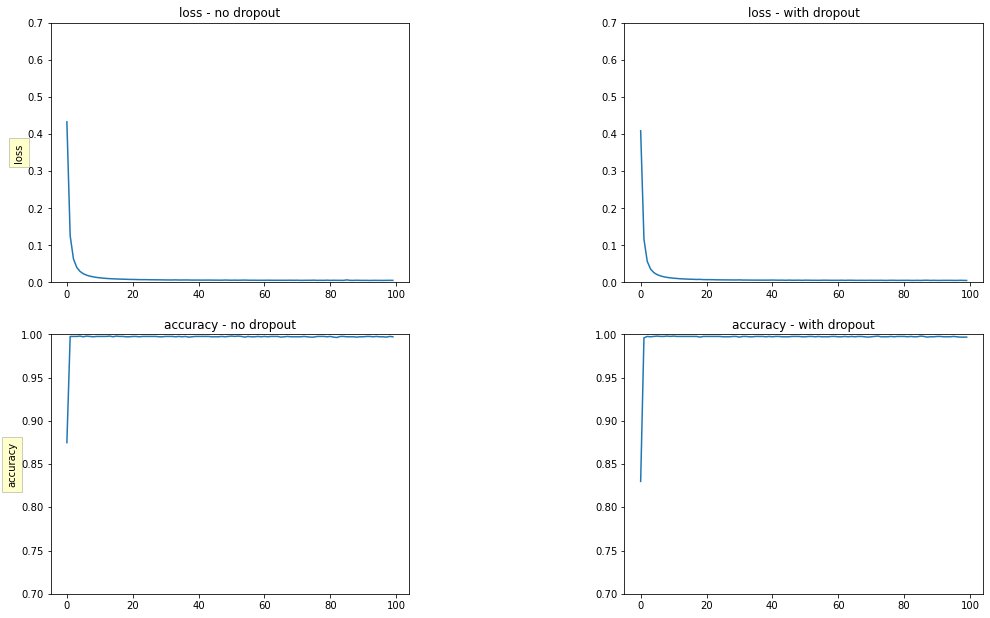

In [65]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.2, wspace=0.6)
make_plot(axs, history_1, history_2)

fig.align_ylabels(axs[:, 1])
fig.set_size_inches(18.5, 10.5)
plt.show()

Text(0.5, 1.0, 'loss')

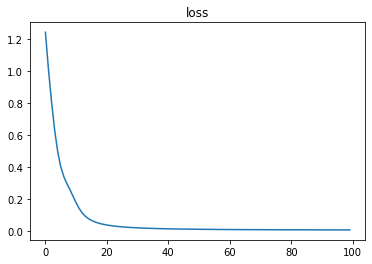

In [50]:
fig, axs = plt.subplots(1, 1)
fig.subplots_adjust(left=0.2, wspace=0.6)
ax1 = axs[0]
plt.plot(history_1.history['loss'])
#ax1.plot(history_1.history['val_loss'])
plt.title('loss') # - no dropout')
#ax1.set_ylabel('loss', bbox=box)
#plt.ylim(0, 0.7)

# Congratulations...
... you've trained a nonlinear classifier with TensorFlow and Keras!